In [80]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio


import math


In [81]:
# df = pd.read_csv("gtzan/features_3_sec.csv")
# df.head()

In [82]:
audio_recording="gtzan/genres_original/hiphop/hiphop.00002.wav"
data,sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [83]:
librosa.load(audio_recording,sr=45600)

(array([-0.03192253, -0.04149077, -0.04386931, ...,  0.11624609,
         0.07115287,  0.        ], dtype=float32),
 45600)

In [84]:
import IPython
IPython.display.Audio(data,rate=sr)

C:\Users\Dude\AppData\Local\Temp\ipykernel_6840\3333955140.py:2: FutureWarning: Pass y=[-0.03308105 -0.04275513 -0.04620361 ...  0.11807251  0.11425781
  0.11431885] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]


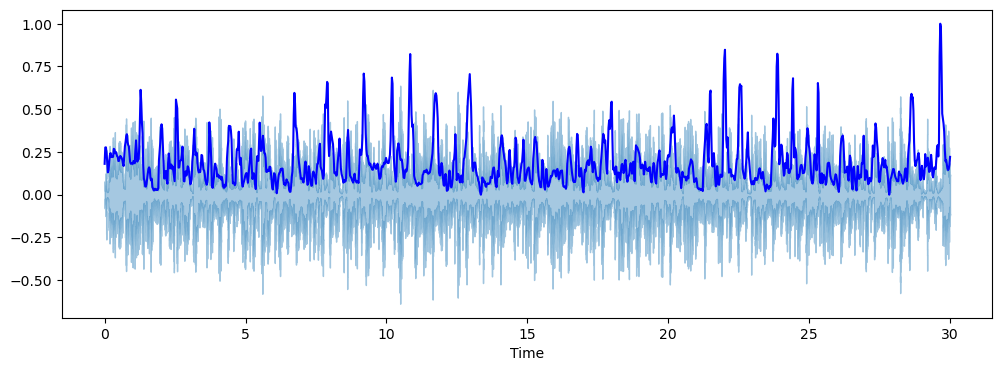

In [85]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]
spectral_centroids.shape

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
y_harmonic, y_percussive = librosa.effects.hpss(data)
# Нормализация спектрального центроида для визуализации
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')


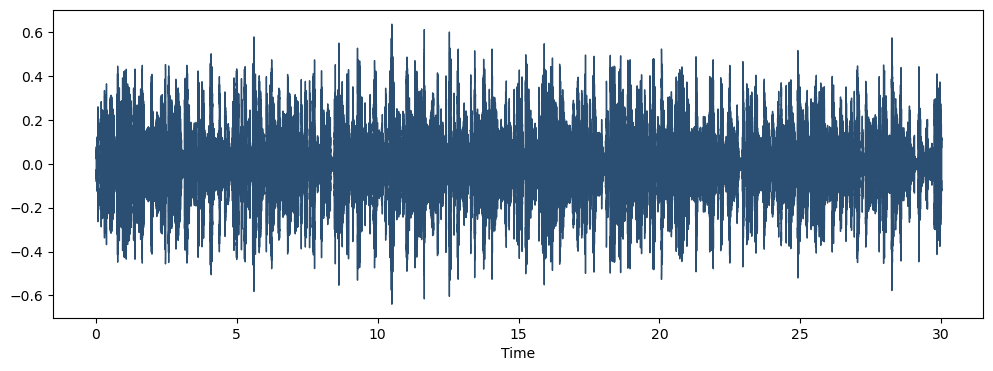

In [86]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data,color="#2B4F72")
plt.show()

e:\anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


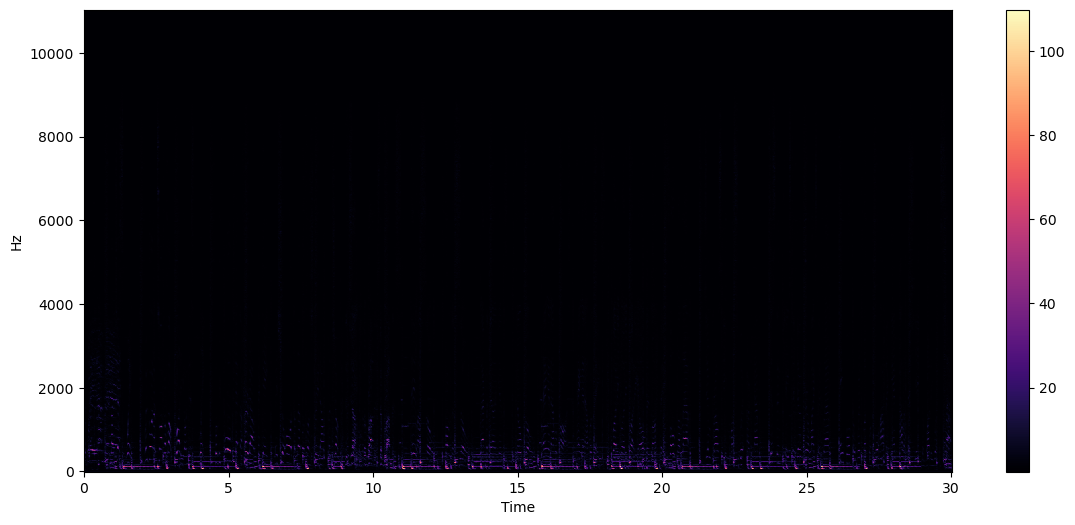

In [87]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

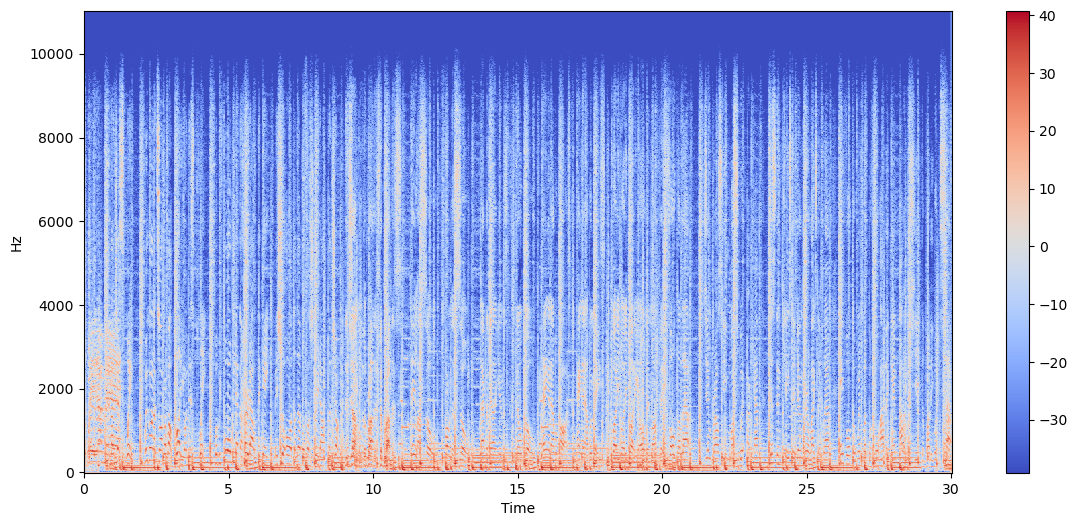

In [88]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

C:\Users\Dude\AppData\Local\Temp\ipykernel_6840\742313470.py:1: FutureWarning: Pass y=[-0.02308105 -0.03275513 -0.03620362 ...  0.12807252  0.12425781
  0.12431885] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]


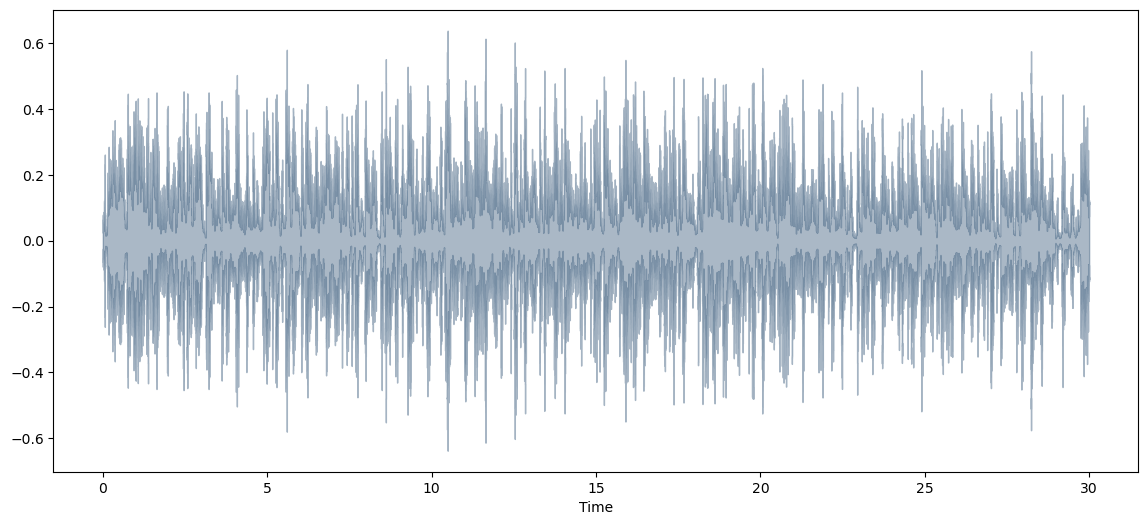

In [89]:
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]
plt.figure(figsize=(14,6))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color="#2B4F72")

C:\Users\Dude\AppData\Local\Temp\ipykernel_6840\1146563947.py:2: FutureWarning: Pass y=[-0.03308105 -0.04275513 -0.04620361 ...  0.11807251  0.11425781
  0.11431885] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data,sr=sr)


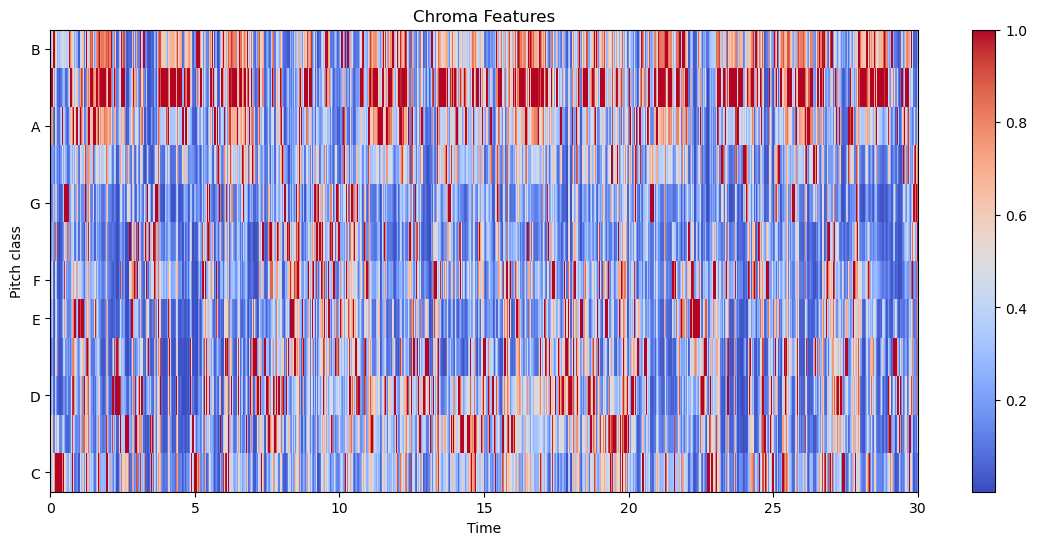

In [90]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data,sr=sr)
plt.figure(figsize=(14,6))
lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

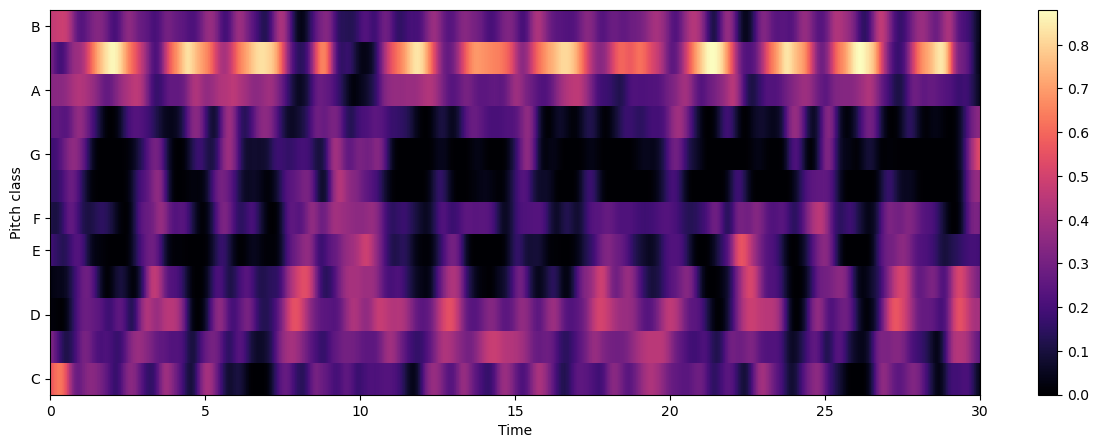

In [91]:
#Chroma Energy Normalized (CENS)
chroma=librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
plt.colorbar()

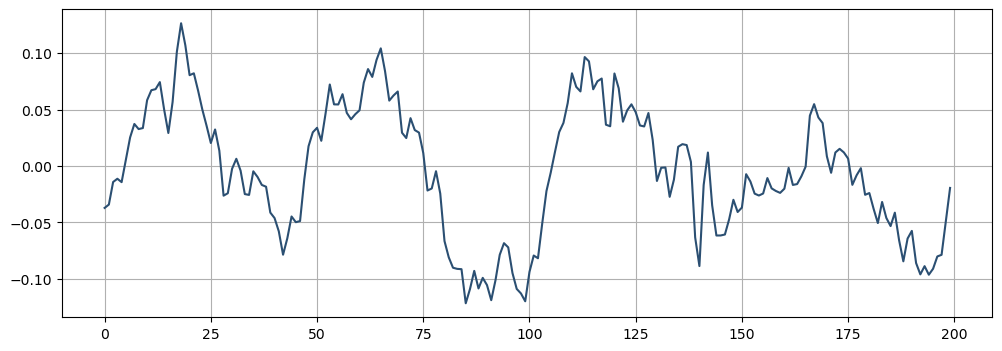

In [92]:
start=1000
end=1200
plt.figure(figsize=(12,4))
plt.plot(data[start:end],color="#2B4F72")
plt.grid()

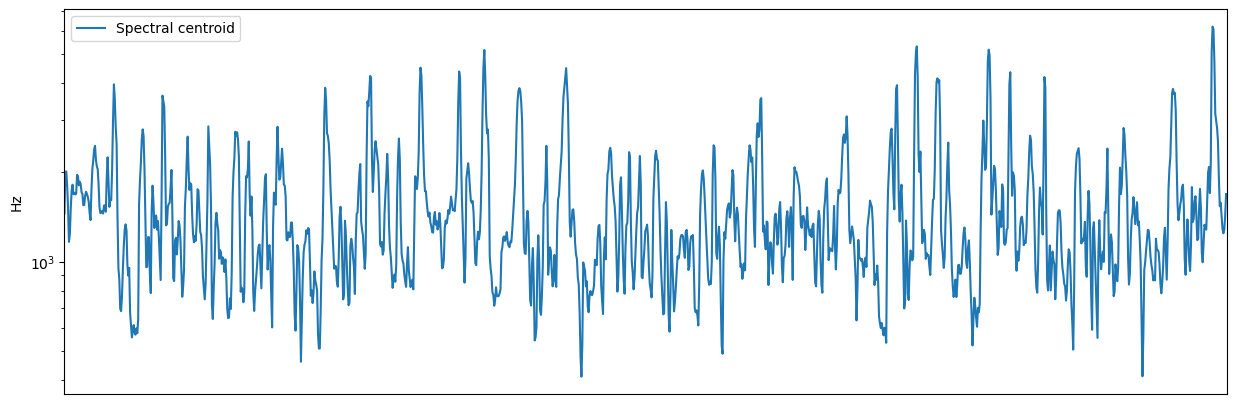

In [93]:
# Spectral Centroid
cent = librosa.feature.spectral_centroid(y=data, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

Text(0.5, 1.0, 'MFCC')

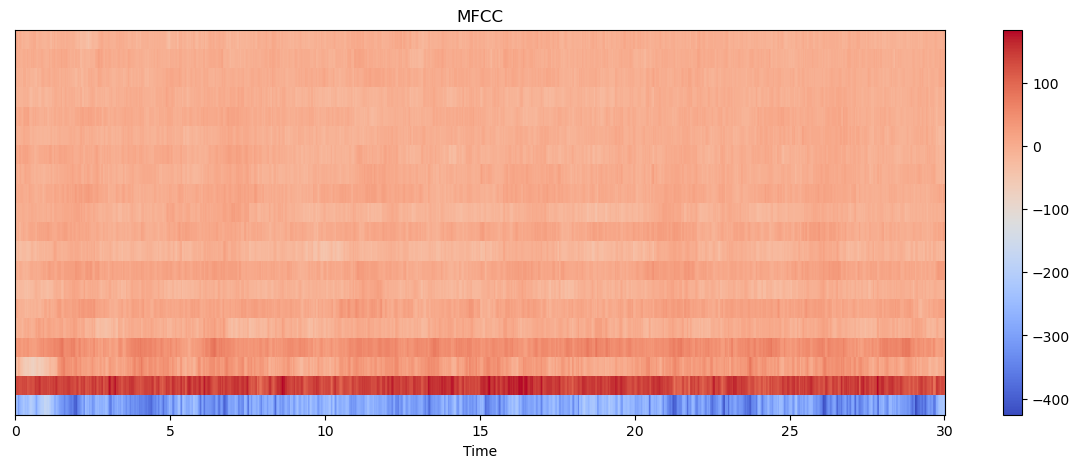

In [94]:
# Calculate MFCCs

mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')